In [49]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data.csv


In [50]:
import pandas as pd
crime=pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [51]:
crime.rename(columns={'Unnamed: 0':'States'},inplace=True)
crime.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [52]:
crime.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [53]:
crime.shape

(50, 5)

In [54]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [55]:
crime[crime.duplicated()].shape

(0, 5)

In [56]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [57]:
numerical_features = crime.describe(include=["int64","float64"]).columns
numerical_features

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

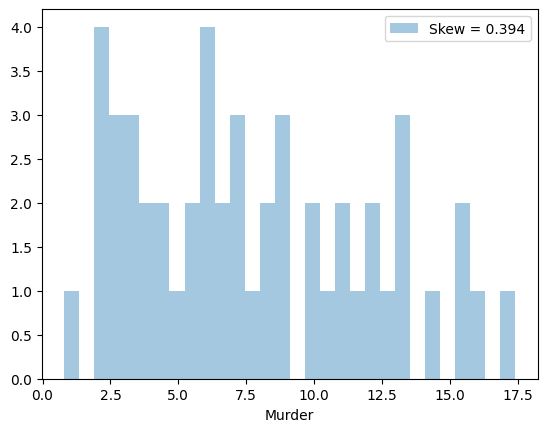

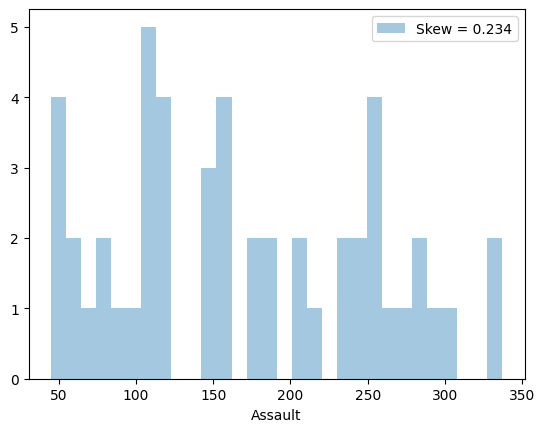

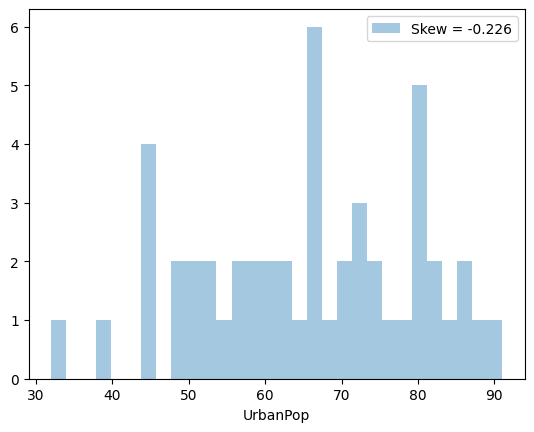

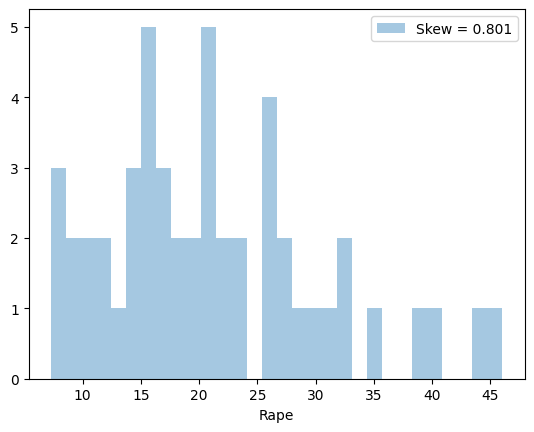

In [58]:
for i in numerical_features:
    skew = crime[i].skew()
    sns.distplot(crime[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

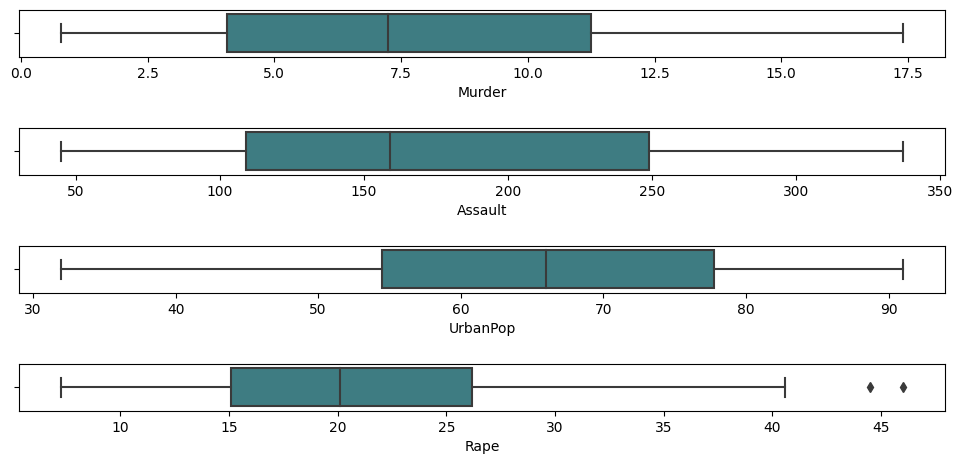

In [59]:
fig, axes = plt.subplots(4,1,figsize=(10,5),sharex=False,sharey=False)
sns.boxplot(x='Murder', data= crime,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data= crime,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data= crime,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data= crime,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

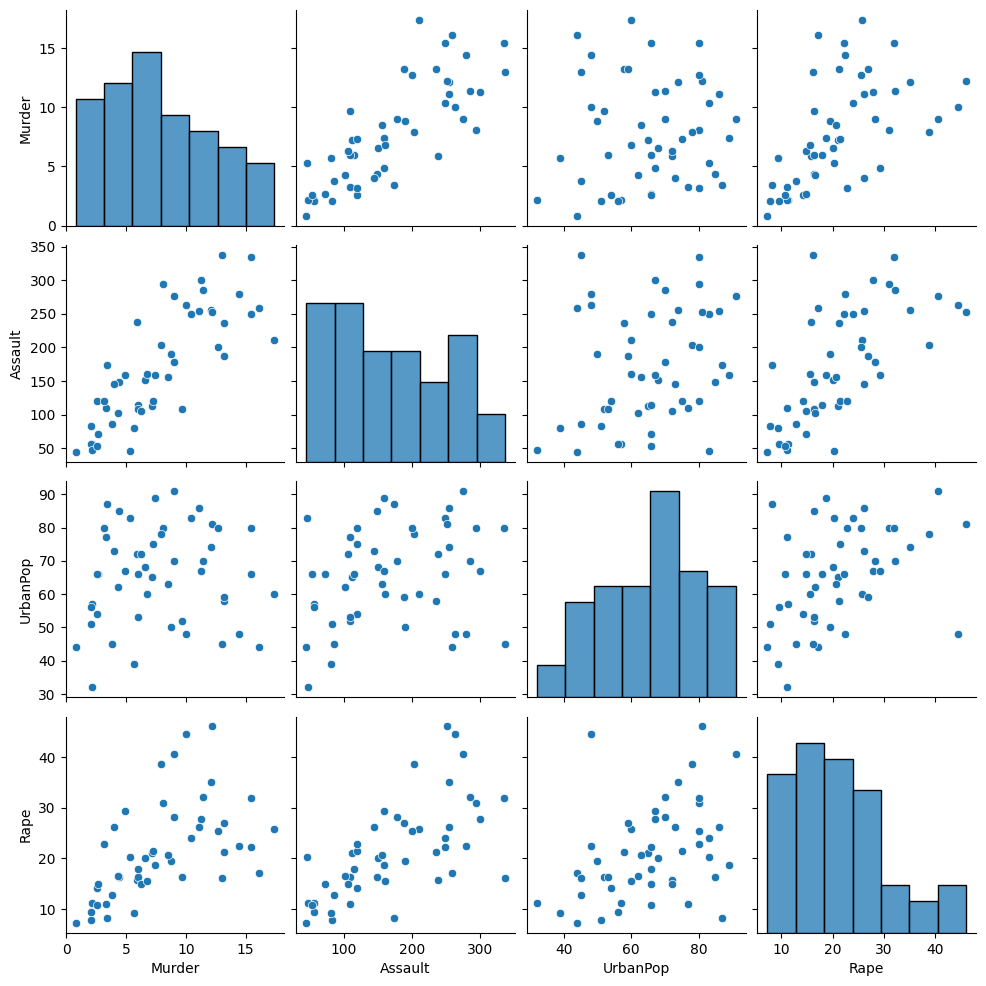

In [60]:
sns.pairplot(crime, palette='coolwarm')
plt.show()

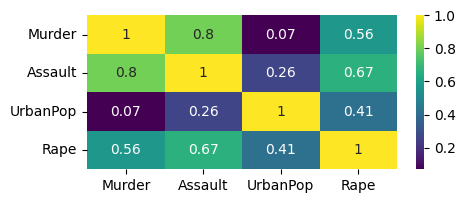

In [61]:
fig, ax = plt.subplots(figsize=(5,2))
sns.heatmap(crime.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

**Hierarchical Clustering**

In [62]:
def minmax_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return (x)

In [63]:
df_norm=minmax_func(crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


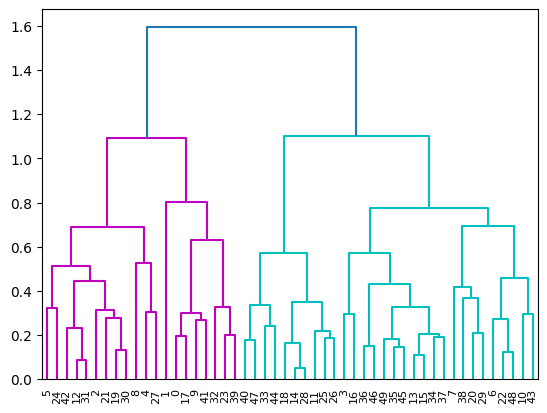

In [64]:
sch.set_link_color_palette(['m','c','y'])
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [65]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [66]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

In [67]:
crime['h_clusterid']=y_hc
crime

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [68]:
crime.groupby('h_clusterid').mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


**Kmeans Clustering**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [70]:
def minmax_funct(i):
  x=(i-i.min())/(i.max()-i.min())
  return (x)

In [71]:
y=minmax_funct(crime.iloc[:,1:])
y.head()

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0.000000
1,0.554217,0.746575,0.271186,0.961240,0.000000
2,0.439759,0.852740,0.813559,0.612403,1.000000
3,0.481928,0.496575,0.305085,0.315245,0.333333
4,0.493976,0.791096,1.000000,0.860465,1.000000


In [72]:
def norm_func(i):
  x=(i-i.mean())/(i.std())
  return (x)

In [73]:
x=norm_func(crime.iloc[:,1:])
x.head()

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,1.242564,0.782839,-0.520907,-0.003416,-1.468739
1,0.507862,1.106823,-1.211764,2.484203,-1.468739
2,0.071633,1.478803,0.998980,1.042878,1.430088
3,0.232349,0.230868,-1.073593,-0.184917,-0.502463
4,0.278268,1.262814,1.758923,2.067820,1.430088


In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_crimes_df=scaler.fit_transform(crime.iloc[:,1:])
scaled_crimes_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.48365074],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.48365074],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.4446073 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.50756473],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.4446073 ],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.4446073 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.50756473],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.50756473],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  1.4446073 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.48365074],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.50756473],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.46852129],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.4446073 ],
       [-0.13637203, -0.70012057, -0.0

[244.99999999999994, 149.42235984401083, 89.09449495482053, 59.687620579398526, 51.1895237721439, 47.18793788771315, 42.38721749022113, 35.75452240647584, 32.833867010236304, 29.573484748135407]


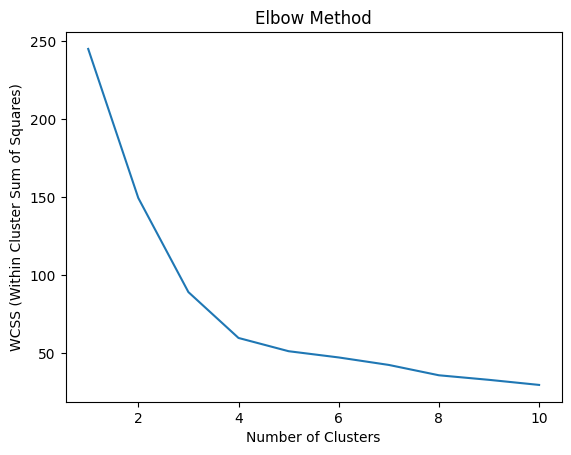

In [75]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

In [76]:
clusters_new=KMeans(4,random_state=0)
clusters_new.fit(x)

KMeans(n_clusters=4, random_state=0)

In [77]:
clusters_new.labels_

array([2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 0, 2, 3, 1, 0, 1,
       0, 2, 1, 3, 3, 1, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 0, 3, 0, 0], dtype=int32)

In [78]:
crime['Clusterid_new']=clusters_new.labels_
crime.head()

,States,Murder,Assault,UrbanPop,Rape,h_clusterid,Clusterid_new
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,3,1
3,Arkansas,8.8,190,50,19.5,1,2
4,California,9.0,276,91,40.6,3,1


In [79]:
crime.groupby('Clusterid_new').mean()

,Murder,Assault,UrbanPop,Rape,h_clusterid
Clusterid_new,,,,,
0,5.552632,129.263158,71.894737,18.026316,1.000000
1,10.883333,256.916667,78.333333,32.250000,3.000000
2,13.500000,245.777778,53.111111,23.977778,0.111111
3,3.180000,78.700000,49.300000,11.630000,2.000000


**DBSCAN Clustering**

In [80]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
crime.drop('States',axis=1,inplace=True)

In [82]:
data=crime.values
data

array([[ 13.2, 236. ,  58. ,  21.2,   0. ,   2. ],
       [ 10. , 263. ,  48. ,  44.5,   0. ,   2. ],
       [  8.1, 294. ,  80. ,  31. ,   3. ,   1. ],
       [  8.8, 190. ,  50. ,  19.5,   1. ,   2. ],
       [  9. , 276. ,  91. ,  40.6,   3. ,   1. ],
       [  7.9, 204. ,  78. ,  38.7,   3. ,   1. ],
       [  3.3, 110. ,  77. ,  11.1,   1. ,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   1. ,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   3. ,   1. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ,   2. ],
       [  5.3,  46. ,  83. ,  20.2,   1. ,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ,   3. ],
       [ 10.4, 249. ,  83. ,  24. ,   3. ,   1. ],
       [  7.2, 113. ,  65. ,  21. ,   1. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ,   3. ],
       [  6. , 115. ,  66. ,  18. ,   1. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   1. ,   0. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ,   2. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ,   3. ],
       [ 11.3, 300. ,  67. ,  2

In [83]:
stscaler=StandardScaler()
X=stscaler.fit_transform(data)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.48365074,
         0.69631062],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.48365074,
         0.69631062],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.4446073 ,
        -0.17407766],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.50756473,
         0.69631062],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.4446073 ,
        -0.17407766],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.4446073 ,
        -0.17407766],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.50756473,
        -1.04446594],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.50756473,
        -1.04446594],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  1.4446073 ,
        -0.17407766],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.48365074,
         0.69631062],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [84]:
dbscan=DBSCAN(eps=4,min_samples=8)
dbscan.fit(X)

DBSCAN(eps=4, min_samples=8)

In [85]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [86]:
crime['Cluster']=pd.DataFrame(dbscan.labels_)
crime.head()

,Murder,Assault,UrbanPop,Rape,h_clusterid,Clusterid_new,Cluster
0,13.2,236,58,21.2,0,2,0
1,10.0,263,48,44.5,0,2,0
2,8.1,294,80,31.0,3,1,0
3,8.8,190,50,19.5,1,2,0
4,9.0,276,91,40.6,3,1,0


In [87]:
crime['Cluster'].value_counts()

0    50
Name: Cluster, dtype: int64

In [88]:
def dbscan(X,eps,min_samples):
  ss=StandardScaler()
  X=ss.fit_transform(X)
  db=DBSCAN(eps=eps,min_samples=min_samples)
  db.fit(X)
  y_pred=db.fit_predict(X)
  plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='Paired')
  plt.title('DBSCAN')

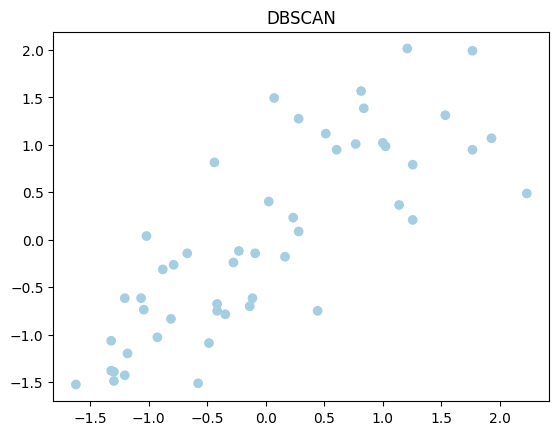

In [89]:
dbscan(data,4,5)